In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer


In [3]:
df = pd.read_csv("../data/processed/train.csv")

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


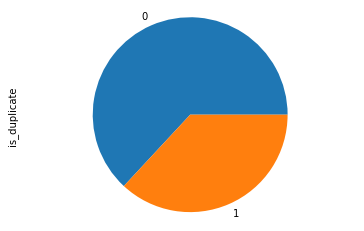

In [5]:
df.is_duplicate.value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

In [6]:
df_all_question = pd.DataFrame(pd.concat([df.question1, df.question2])).reset_index(drop=True)
df_all_question.columns = ['questions']

In [7]:
df_all_question['word_count'] = df_all_question['questions'].apply(lambda x : len(str(x).split()))
df_all_question['character_count'] = df_all_question['questions'].apply(lambda x : len(str(x)))

In [8]:
df_all_question.head()

,questions,word_count,character_count
0,What is the step by step guide to invest in sh...,14,66
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,8,51
2,How can I increase the speed of my internet co...,14,73
3,Why am I mentally very lonely? How can I solve...,11,50
4,"Which one dissolve in water quikly sugar, salt...",13,76


In [9]:
word_distribution = df_all_question['word_count'].value_counts()
character_distribution = df_all_question['character_count'].value_counts()

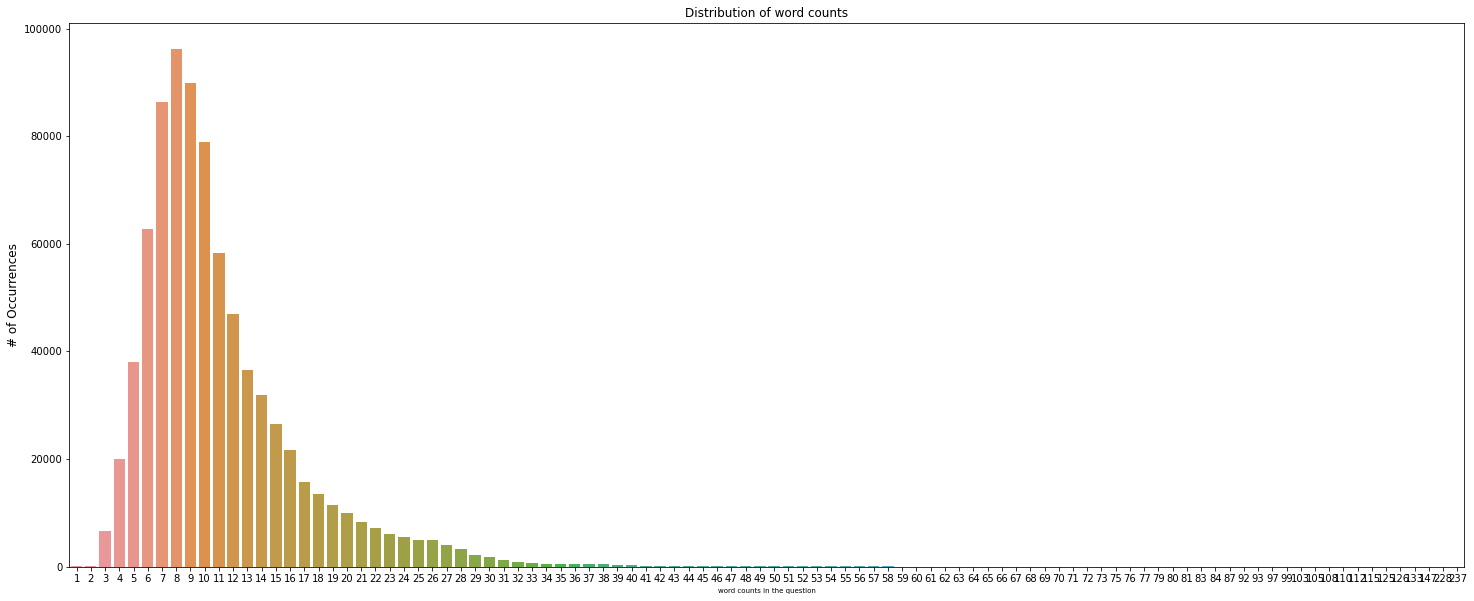

In [10]:
plt.subplots(figsize = (25,10))
sns.barplot(x = word_distribution.index, y = word_distribution.values)
plt.title('Distribution of word counts')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('word counts in the question', fontsize=7)
plt.show()

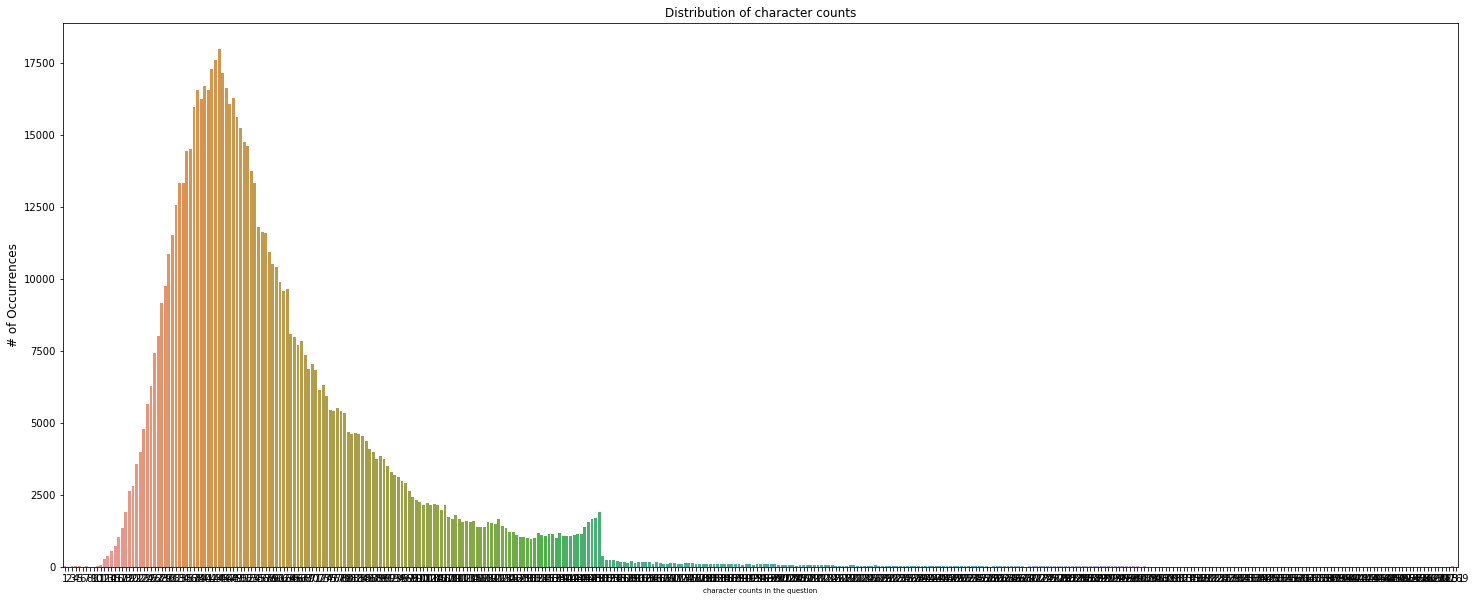

In [11]:
plt.subplots(figsize = (25,10))
sns.barplot(x = character_distribution.index, y = character_distribution.values)
plt.title('Distribution of character counts')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('character counts in the question', fontsize=7)
plt.show()

In [12]:
import nltk
from nltk import word_tokenize, ngrams
from nltk.corpus import stopwords

In [13]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", s)
    s = re.sub(r"what's", "what is ", s)
    s = re.sub(r"\'s", " ", s)
    s = re.sub(r"\'ve", " have ", s)
    s = re.sub(r"can't", "cannot ", s)
    s = re.sub(r"n't", " not ", s)
    s = re.sub(r"i'm", "i am ", s)
    s = re.sub(r"\'re", " are ", s)
    s = re.sub(r"\'d", " would ", s)
    s = re.sub(r"\'ll", " will ", s)
    s = re.sub(r",", " ", s)
    s = re.sub(r"\.", " ", s)
    s = re.sub(r"!", " ! ", s)
    s = re.sub(r"\/", " ", s)
    s = re.sub(r"\^", " ^ ", s)
    s = re.sub(r"\+", " + ", s)
    s = re.sub(r"\-", " - ", s)
    s = re.sub(r"\=", " = ", s)
    s = re.sub(r"'", " ", s)
    s = re.sub(r"(\d+)(k)", r"\g<1>000", s)
    s = re.sub(r":", " : ", s)
    s = re.sub(r" e g ", " eg ", s)
    s = re.sub(r" b g ", " bg ", s)
    s = re.sub(r" u s ", " american ", s)
    s = re.sub(r"\0s", "0", s)
    s = re.sub(r" 9 11 ", "911", s)
    s = re.sub(r"e - mail", "email", s)
    s = re.sub(r"j k", "jk", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r"what's", "", s)
    s = re.sub(r"\'s", " ", s)
    s = re.sub(r"\'ve", " have ", s)
    s = re.sub(r"can't", "cannot ", s)
    s = re.sub(r"n't", " not ", s)
    s = re.sub(r" m ", " am ", s)
    s = re.sub(r"\'re", " are ", s)
    s = re.sub(r"\'d", " would ", s)
    s = re.sub(r"60k", " 60000 ", s)
    s = re.sub(r"\0s", "0", s)
    s = re.sub(r"e-mail", "email", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r"quikly", "quickly", s)
    s = re.sub(r" usa ", " america ", s)
    s = re.sub(r" uk ", " england ", s)
    s = re.sub(r"imrovement", "improvement", s)
    s = re.sub(r"intially", "initially", s)
    s = re.sub(r" dms ", "direct messages ", s)  
    s = re.sub(r"demonitization", "demonetization", s) 
    s = re.sub(r"actived", "active", s)
    s = re.sub(r"kms", " kilometers ", s)
    s = re.sub(r" cs ", " computer science ", s) 
    s = re.sub(r" upvotes ", " up votes ", s)
    s = re.sub(r" iPhone ", " phone ", s)
    s = re.sub(r"\0rs ", " rs ", s) 
    s = re.sub(r"calender", "calendar", s)
    s = re.sub(r"ios", "operating system", s)
    s = re.sub(r"gps", "GPS", s)
    s = re.sub(r"gst", "GST", s)
    s = re.sub(r"programing", "programming", s)
    s = re.sub(r"bestfriend", "best friend", s)
    s = re.sub(r"III", "3", s) 
    s = re.sub(r"the us", "america", s)
    return s
df['question1'] = [cleaning(s) for s in df['question1']]
df['question2'] = [cleaning(s) for s in df['question2']]

In [14]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist()) #adding two lists [1,2,3,4] + [2,3,4] gives [1,2,3,4,2,3,4]
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



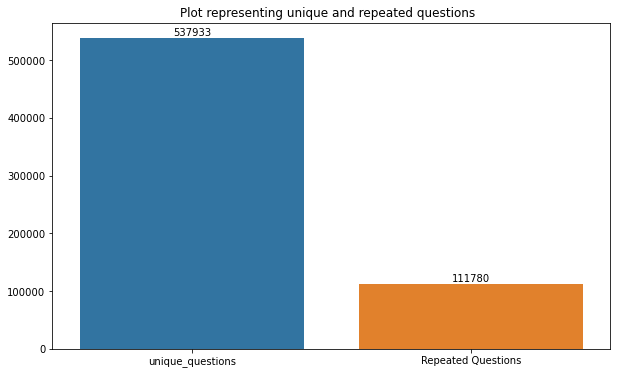

In [29]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]



fig,ax = plt.subplots(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y, ax=ax)

for index, row in enumerate(y):
    ax.text(index,row+5000, row, color='black', ha="center")

plt.show()

Maximum number of times a single question is repeated: 157



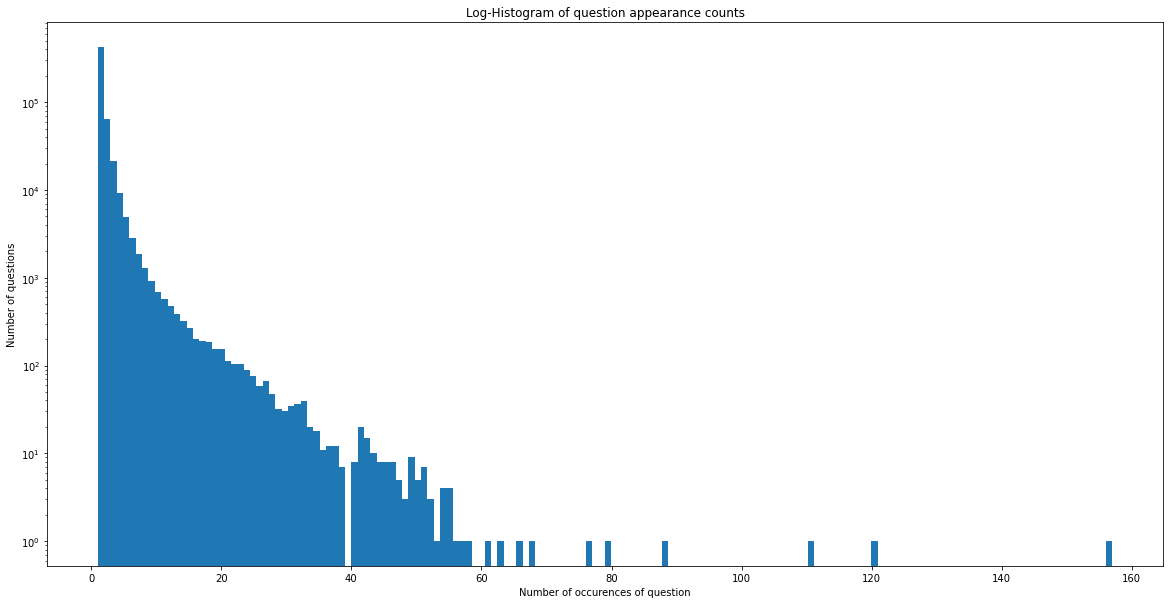

In [31]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [32]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [33]:
def get_unigram(question):
    return list(set([ps.stem(word) for word in word_tokenize(question.lower()) if word not in stop_words]))

In [34]:
df['unigram_ques1'] = df['question1'].apply(lambda x : get_unigram(str(x)))
df['unigram_ques2'] = df['question2'].apply(lambda x : get_unigram(str(x)))

In [35]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [36]:
def get_common_unigram(row):
    return len(set(row['unigram_ques1']).intersection(set(row['unigram_ques2'])))

def get_common_word_ratio(row):
    return row['word_share'] / row['word_Total']

def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) 
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))


In [37]:
df['word_share'] = df.apply(lambda x : get_common_unigram(x), axis=1)

In [38]:
df['word_Total'] = df.apply(normalized_word_Total, axis=1)

In [39]:
df['common_word_ratio'] = df.apply(lambda x: get_common_word_ratio(x), axis =1)

In [40]:
df.head(15)

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,word_Total,common_word_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,"[share, step, india, guid, market, invest]","[share, step, guid, market, invest]",1,1,66,57,15,13,5,25.0,0.200000
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,"[koh, noor, diamond, stori, kohinoor]","[indian, koh, noor, govern, happen, diamond, b...",4,1,49,86,11,16,4,26.0,0.153846
2,2,5,6,how can i increase the speed of my internet nn...,how can internet speed be increased by hacking...,0,"[internet, nnection, increas, vpn, use, speed]","[internet, increas, dn, hack, speed]",1,1,71,59,15,11,3,26.0,0.115385
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math math is divided by,0,"[solv, mental, lone]","[math, find, remaind, divid]",1,1,49,48,12,10,0,20.0,0.000000
4,4,9,10,which one dissolve in water quickly sugar salt...,which fish would survive in salt water,0,"[oxid, water, methan, di, one, salt, sugar, qu...","[water, fish, salt, surviv, would]",3,1,75,39,14,8,2,22.0,0.090909
5,5,11,12,astrology i am a caprirn sun cap moon and cap ...,i am a triple caprirn sun moon and ascendant i...,1,"[caprirn, say, rise, moon, cap, astrolog, sun]","[tripl, caprirn, say, moon, sun, ascend]",1,1,81,84,18,18,4,34.0,0.117647
6,6,13,14,should i buy tiago,what keeps childern active and far from phone ...,0,"[tiago, buy]","[far, activ, game, keep, phone, childern, video]",1,1,19,62,5,12,0,16.0,0.000000
7,7,15,16,how can i be a good geologist,what should i do to be a great geologist,1,"[good, geologist]","[great, geologist]",1,1,30,41,8,10,1,18.0,0.055556
8,8,17,18,when do you use instead of,when do you use instead of and,0,"[instead, use]","[instead, use]",1,2,27,31,7,8,2,15.0,0.133333
9,9,19,20,motorola mpany can i hack my charter motorolla...,how do i hack motorola dcx for free internet,0,"[motorolla, motorola, mpani, charter, hack, dcx]","[internet, motorola, free, hack, dcx]",1,1,51,45,10,10,3,20.0,0.150000


In [41]:
unigram_common_words = df['word_share'].value_counts()

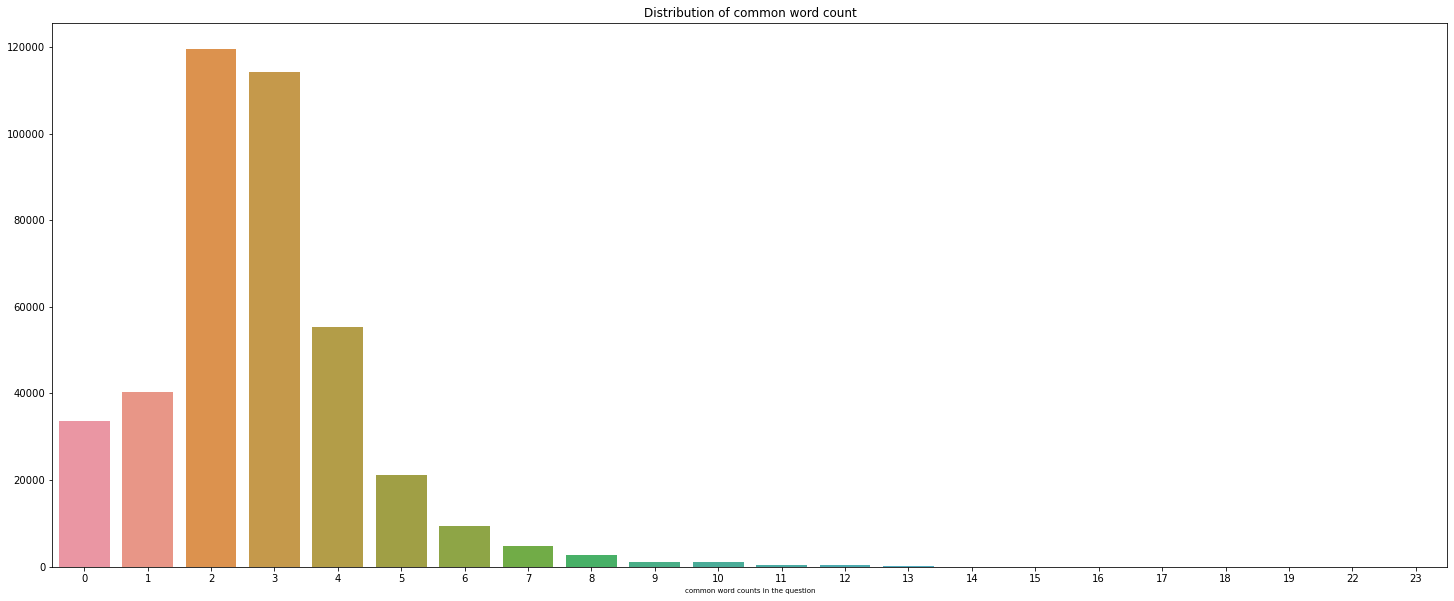

In [42]:
plt.subplots(figsize = (25,10))
sns.barplot(unigram_common_words.index, unigram_common_words.values)
plt.title('Distribution of common word count', fontsize = 12)
plt.xlabel('common word counts in the question', fontsize=7)
plt.show()

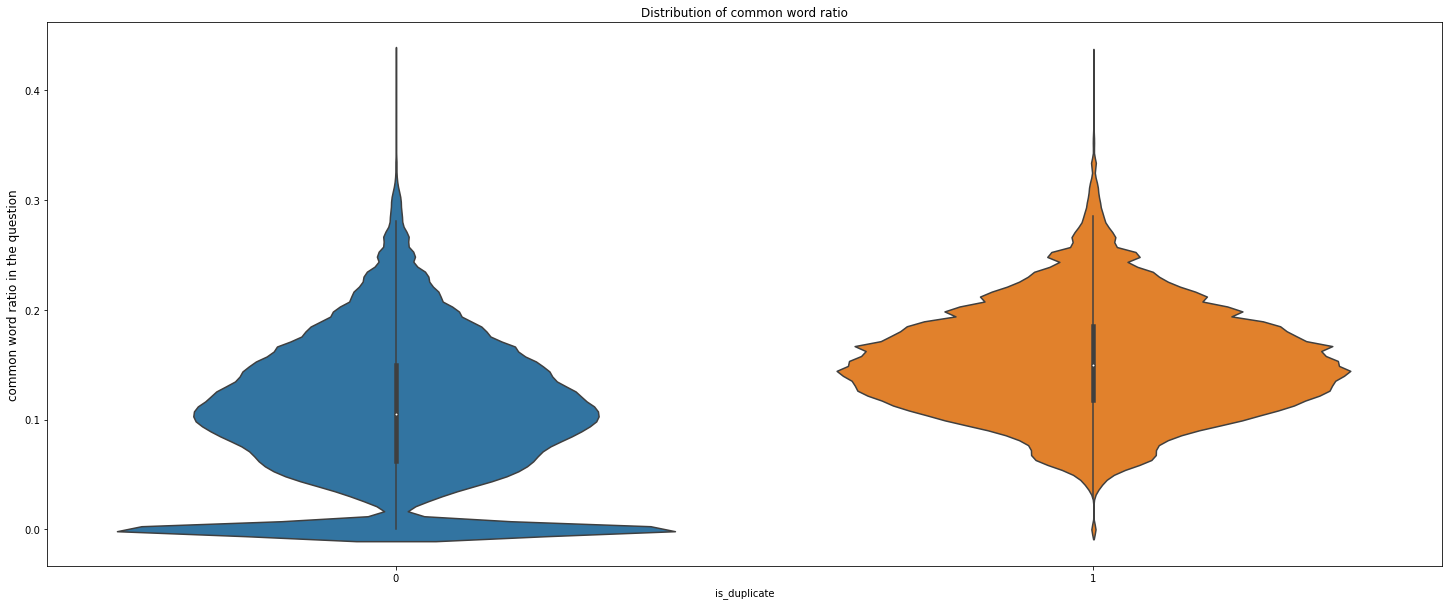

In [43]:
plt.subplots(figsize = (25,10))
sns.violinplot(x = 'is_duplicate', y = 'common_word_ratio', data = df)
plt.title('Distribution of common word ratio', fontsize = 12)
plt.ylabel('common word ratio in the question', fontsize=12)
plt.show()

In [52]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,word_Total,common_word_ratio,words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,"[share, step, india, guid, market, invest]","[share, step, guid, market, invest]",1,1,66,57,15,13,5,25.0,0.200000,"[share, step, india, guid, market, invest]"
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,"[koh, noor, diamond, stori, kohinoor]","[indian, koh, noor, govern, happen, diamond, b...",4,1,49,86,11,16,4,26.0,0.153846,"[koh, indian, noor, govern, stori, diamond, ha..."
2,2,5,6,how can i increase the speed of my internet nn...,how can internet speed be increased by hacking...,0,"[internet, nnection, increas, vpn, use, speed]","[internet, increas, dn, hack, speed]",1,1,71,59,15,11,3,26.0,0.115385,"[internet, nnection, increas, vpn, use, dn, ha..."
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math math is divided by,0,"[solv, mental, lone]","[math, find, remaind, divid]",1,1,49,48,12,10,0,20.0,0.000000,"[mental, lone, remaind, math, solv, find, divid]"
4,4,9,10,which one dissolve in water quickly sugar salt...,which fish would survive in salt water,0,"[oxid, water, methan, di, one, salt, sugar, qu...","[water, fish, salt, surviv, would]",3,1,75,39,14,8,2,22.0,0.090909,"[oxid, water, fish, methan, di, one, would, sa..."


In [51]:
df['words'] = (df['unigram_ques1'] + df['unigram_ques2']).apply(lambda x : list(set(x)))

In [53]:
vocab = list(set([a for b in df.words.tolist() for a in b]))

In [54]:
print(len(vocab))

58596


['icbm',
 'snitch',
 'whe',
 'bigmmerc',
 'sfo',
 'adelaid',
 'shaquil',
 'abv',
 'fault',
 'naturallyspeak']